In [2]:
install.packages("eurostat")
install.packages("xts")
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("gridExtra")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘Rcpp’, ‘e1071’, ‘plyr’, ‘bibtex’, ‘here’, ‘classInt’, ‘countrycode’, ‘RefManageR’, ‘regions’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(eurostat)
library(xts)
library(tidyverse)
library(ggplot2)
library(gridExtra)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::first()  masks xts::first()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::last()   masks xts::last()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [4]:
id12="prc_hicp_mv12r" #monthly/yoy
dat12 <- get_eurostat(id12)
id="prc_hicp_manr" #monthly/yoy
dat<- get_eurostat(id)
id_ppi = "sts_inpp_m"
dat_ppi<- get_eurostat(id_ppi)


Table prc_hicp_mv12r cached at /tmp/RtmpTry9jy/eurostat/prc_hicp_mv12r_date_code_FF.rds

Table prc_hicp_manr cached at /tmp/RtmpTry9jy/eurostat/prc_hicp_manr_date_code_FF.rds

Table sts_inpp_m cached at /tmp/RtmpTry9jy/eurostat/sts_inpp_m_date_code_FF.rds



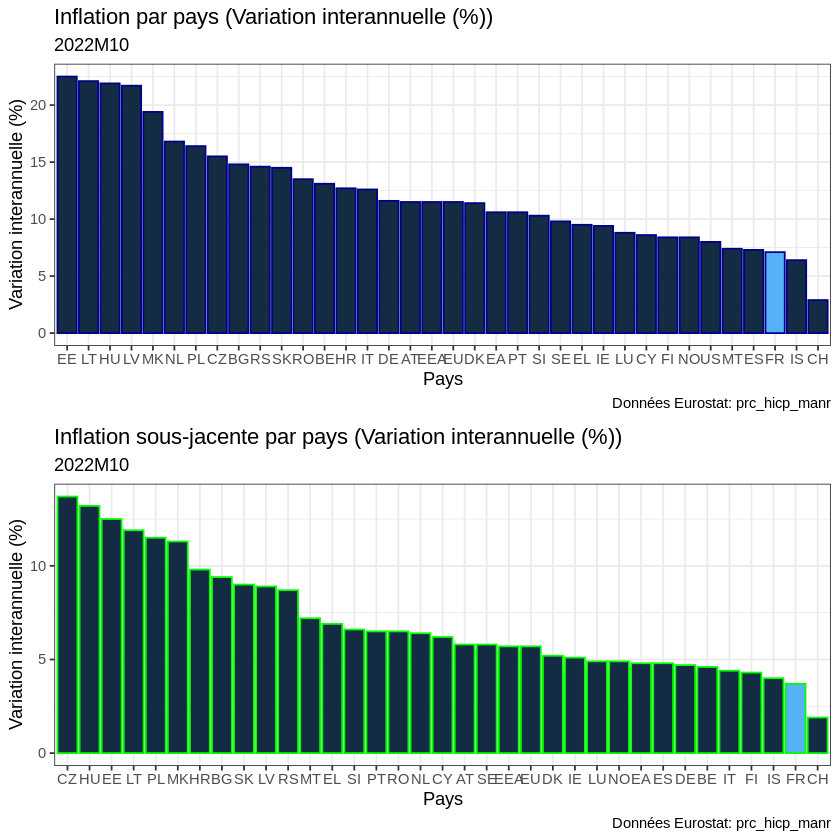

In [5]:
dat_select=  dplyr::filter(dat,coicop=="CP00",  geo!= "TR",geo!="EU27_2020", geo!="EA18",  geo!="EA19",  geo!="EA ",  geo!="EEA ", time=="2022-10-01") #Achats directs fréquents
dat_select=data.frame(dat_select, YesNo=rep(0, nrow(dat_select)))
dat_select[dat_select$geo=="FR",]$YesNo=1
p1<-ggplot(data=dat_select, aes(x=reorder(geo, -values), y=values, fill=YesNo)) +
  geom_bar(stat="identity", color=c("darkblue")) +   
  labs(title="Inflation par pays (Variation interannuelle (%))", subtitle= "2022M10", y="Variation interannuelle (%)", x="Pays", caption="Données Eurostat: prc_hicp_manr") +
  theme_bw() + theme(legend.position="none")

#GRAPH HCPI 
dat_select=  dplyr::filter(dat,coicop=="TOT_X_NRG_FOOD", geo!= "TR",geo!="EU27_2020", geo!="EA18",  geo!="EA19",  geo!="EA ",  geo!="EEA ",time=="2022-09-01") #Achats directs fréquents
dat_select=data.frame(dat_select, YesNo=rep(0, nrow(dat_select)))
dat_select[dat_select$geo=="FR",]$YesNo=1
p2<-ggplot(data=dat_select, aes(x=reorder(geo, -values), y=values, fill=YesNo)) +
    geom_bar(stat="identity", color=c("green")) +   
    labs(title="Inflation sous-jacente par pays (Variation interannuelle (%))", subtitle= "2022M10", y="Variation interannuelle (%)", x="Pays", caption="Données Eurostat: prc_hicp_manr") +
    theme_bw() + theme(legend.position="none")
grid.arrange(p1, p2, ncol=1, nrow =2)


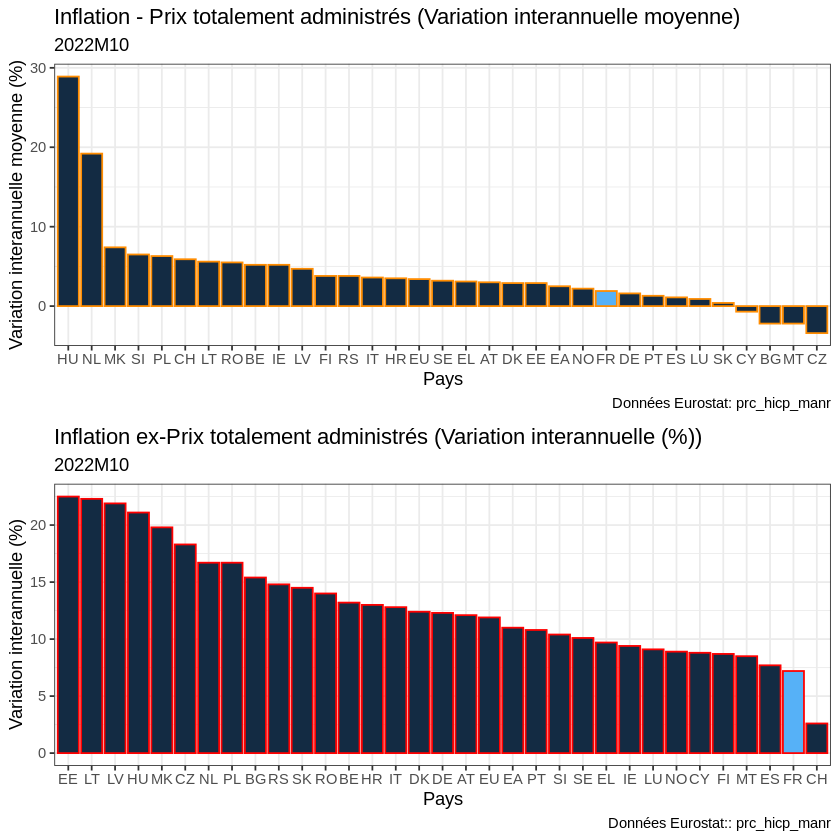

In [6]:

dat_select=  dplyr::filter(dat,coicop=="APF", geo!= "TR",geo!="EU27_2020", geo!="EA18",  geo!="EA19",  geo!="EA ",  geo!="EEA ", time=="2022-10-01") #Achats directs fréquents
dat_select=data.frame(dat_select, YesNo=rep(0, nrow(dat_select)))
dat_select[dat_select$geo=="FR",]$YesNo=1

p3<-ggplot(data=dat_select, aes(x=reorder(geo, -values), y=values, fill=YesNo)) +
  geom_bar(stat="identity", color=c("darkorange")) +   
  labs(title="Inflation - Prix totalement administrés (Variation interannuelle moyenne)", subtitle= "2022M10", y="Variation interannuelle moyenne (%)", x="Pays", caption="Données Eurostat: prc_hicp_manr") +
  theme_bw() + theme(legend.position="none")

dat_select=  dplyr::filter(dat,coicop=="TOT_X_APF", geo!= "TR",geo!="EU27_2020", geo!="EA18",  geo!="EA19",  geo!="EA ",  geo!="EEA ", time=="2022-10-01") #Achats directs fréquents
dat_select=data.frame(dat_select, YesNo=rep(0, nrow(dat_select)))
dat_select[dat_select$geo=="FR",]$YesNo=1

p4<-ggplot(data=dat_select, aes(x=reorder(geo, -values), y=values, fill=YesNo)) +
  geom_bar(stat="identity", color=c("red")) +   
  labs(title="Inflation ex-Prix totalement administrés (Variation interannuelle (%))", subtitle= "2022M10", y="Variation interannuelle (%)", x="Pays", caption="Données Eurostat:: prc_hicp_manr") +
  theme_bw() + theme(legend.position="none")
grid.arrange(p3, p4, ncol=1, nrow =2)



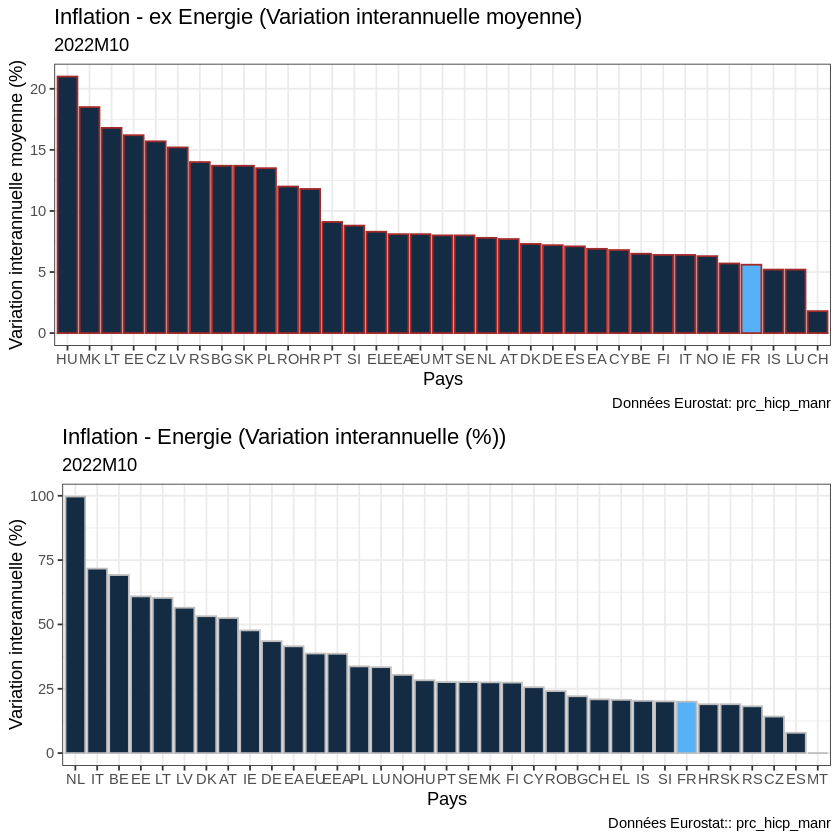

In [7]:
dat_select=  dplyr::filter(dat,coicop=="TOT_X_NRG", geo!= "TR",geo!="EU27_2020", geo!="EA18",  geo!="EA19",  geo!="EA ",  geo!="EEA ",  time=="2022-10-01") #Achats directs fréquents
dat_select=data.frame(dat_select, YesNo=rep(0, nrow(dat_select)))
dat_select[dat_select$geo=="FR",]$YesNo=1

p5<-ggplot(data=dat_select, aes(x=reorder(geo, -values), y=values, fill=YesNo)) +
  geom_bar(stat="identity", color=c("brown")) +   
  labs(title="Inflation - ex Energie (Variation interannuelle moyenne)", subtitle= "2022M10", y="Variation interannuelle moyenne (%)", x="Pays", caption="Données Eurostat: prc_hicp_manr") +
  theme_bw() + theme(legend.position="none")

dat_select=  dplyr::filter(dat,coicop=="NRG", geo!= "TR",geo!="EU27_2020", geo!="EA18",  geo!="EA19",  geo!="EA ",   geo!="EEA ", time=="2022-10-01") #Achats directs fréquents
dat_select=data.frame(dat_select, YesNo=rep(0, nrow(dat_select)))
dat_select[dat_select$geo=="FR",]$YesNo=1

p6<-ggplot(data=dat_select, aes(x=reorder(geo, -values), y=values, fill=YesNo)) +
  geom_bar(stat="identity", color=c("grey")) +   
  labs(title="Inflation - Energie (Variation interannuelle (%))", subtitle= "2022M10", y="Variation interannuelle (%)", x="Pays", caption="Données Eurostat:: prc_hicp_manr") +
  theme_bw() + theme(legend.position="none")
grid.arrange(p5, p6, ncol=1, nrow =2)



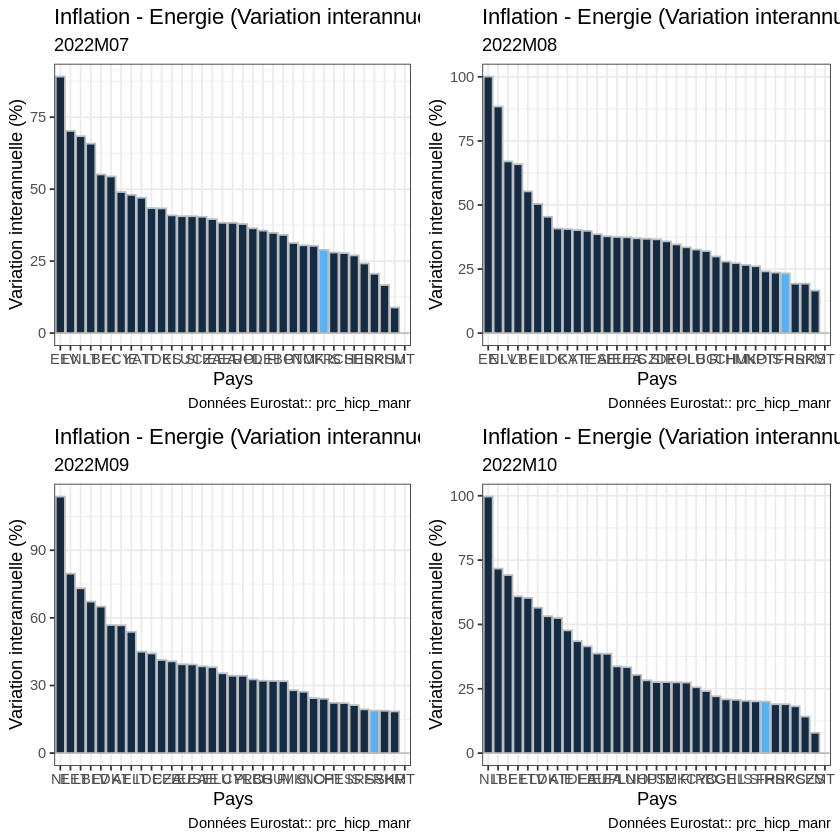

In [8]:

dat_select=  dplyr::filter(dat,coicop=="NRG", geo!= "TR",geo!="EU27_2020", geo!="EA18",  geo!="EA19",  geo!="EA ",   geo!="EEA ", time=="2022-07-01") #Achats directs fréquents
dat_select=data.frame(dat_select, YesNo=rep(0, nrow(dat_select)))
dat_select[dat_select$geo=="FR",]$YesNo=1

p7<-ggplot(data=dat_select, aes(x=reorder(geo, -values), y=values, fill=YesNo)) +
  geom_bar(stat="identity", color=c("grey")) +   
  labs(title="Inflation - Energie (Variation interannuelle (%))", subtitle= "2022M07", y="Variation interannuelle (%)", x="Pays", caption="Données Eurostat:: prc_hicp_manr") +
  theme_bw() + theme(legend.position="none")


dat_select=  dplyr::filter(dat,coicop=="NRG", geo!= "TR",geo!="EU27_2020", geo!="EA18",  geo!="EA19",  geo!="EA ",   geo!="EEA ", time=="2022-08-01") #Achats directs fréquents
dat_select=data.frame(dat_select, YesNo=rep(0, nrow(dat_select)))
dat_select[dat_select$geo=="FR",]$YesNo=1

p8<-ggplot(data=dat_select, aes(x=reorder(geo, -values), y=values, fill=YesNo)) +
  geom_bar(stat="identity", color=c("grey")) +   
  labs(title="Inflation - Energie (Variation interannuelle (%))", subtitle= "2022M08", y="Variation interannuelle (%)", x="Pays", caption="Données Eurostat:: prc_hicp_manr") +
  theme_bw() + theme(legend.position="none")

dat_select=  dplyr::filter(dat,coicop=="NRG", geo!= "TR",geo!="EU27_2020", geo!="EA18",  geo!="EA19",  geo!="EA ",   geo!="EEA ", time=="2022-09-01") #Achats directs fréquents
dat_select=data.frame(dat_select, YesNo=rep(0, nrow(dat_select)))
dat_select[dat_select$geo=="FR",]$YesNo=1

p9<-ggplot(data=dat_select, aes(x=reorder(geo, -values), y=values, fill=YesNo)) +
  geom_bar(stat="identity", color=c("grey")) +   
  labs(title="Inflation - Energie (Variation interannuelle (%))", subtitle= "2022M09", y="Variation interannuelle (%)", x="Pays", caption="Données Eurostat:: prc_hicp_manr") +
  theme_bw() + theme(legend.position="none")

dat_select=  dplyr::filter(dat,coicop=="NRG", geo!= "TR",geo!="EU27_2020", geo!="EA18",  geo!="EA19",  geo!="EA ",   geo!="EEA ", time=="2022-10-01") #Achats directs fréquents
dat_select=data.frame(dat_select, YesNo=rep(0, nrow(dat_select)))
dat_select[dat_select$geo=="FR",]$YesNo=1

p10<-ggplot(data=dat_select, aes(x=reorder(geo, -values), y=values, fill=YesNo)) +
  geom_bar(stat="identity", color=c("grey")) +   
  labs(title="Inflation - Energie (Variation interannuelle (%))", subtitle= "2022M10", y="Variation interannuelle (%)", x="Pays", caption="Données Eurostat:: prc_hicp_manr") +
  theme_bw() + theme(legend.position="none")

grid.arrange(p7, p8, p9, p10,  ncol=2, nrow =2)


**PPI**


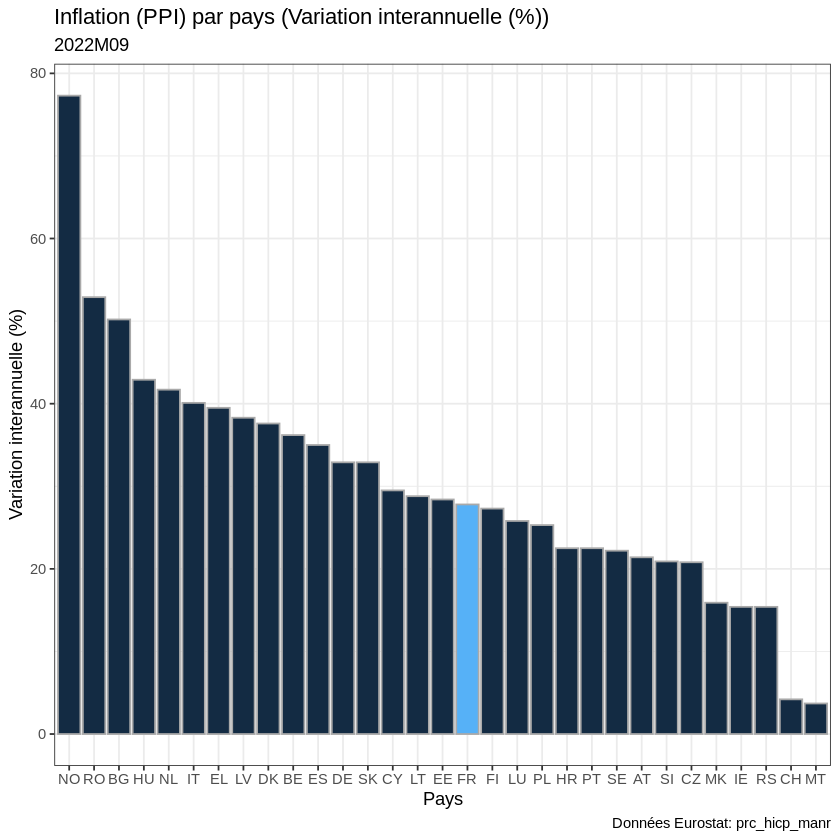

In [ ]:
dat_select=  dplyr::filter(dat_ppi,unit=="PCH_SM", nace_r2== "B-E36", geo!= "TR",geo!="EU27_2020", geo!="EA18",  geo!="EA19",  geo!="EA ",  geo!="EEA ", time=="2022-09-01") #Achats directs fréquents
dat_select=data.frame(dat_select, YesNo=rep(0, nrow(dat_select)))
dat_select[dat_select$geo=="FR",]$YesNo=1
p1<-ggplot(data=dat_select, aes(x=reorder(geo, -values), y=values, fill=YesNo)) +
  geom_bar(stat="identity", color=c("darkgrey")) +   
  labs(title="Inflation (PPI) par pays (Variation interannuelle (%))", subtitle= "2022M09", y="Variation interannuelle (%)", x="Pays", caption="Données Eurostat: prc_hicp_manr") +
  theme_bw() + theme(legend.position="none")

print(p1)

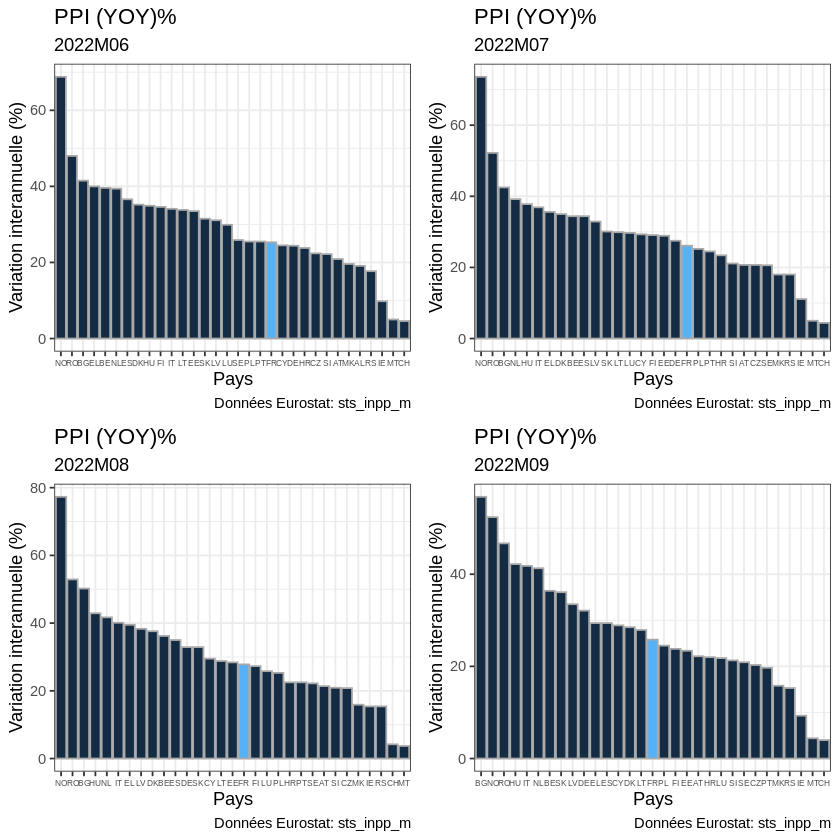

In [ ]:
dat_select=  dplyr::filter(dat_ppi,unit=="PCH_SM", nace_r2== "B-E36", geo!= "TR",geo!="EU27_2020", geo!="EA18",  geo!="EA19",  geo!="EA ",  geo!="EEA ", time=="2022-06-01") #Achats directs fréquents
dat_select=data.frame(dat_select, YesNo=rep(0, nrow(dat_select)))
dat_select[dat_select$geo=="FR",]$YesNo=1
p11<-ggplot(data=dat_select, aes(x=reorder(geo, -values), y=values, fill=YesNo)) +
  geom_bar(stat="identity", color=c("darkgrey")) +   
  labs(title="PPI (YOY)%", subtitle= "2022M06", y="Variation interannuelle (%)", x="Pays", caption="Données Eurostat: sts_inpp_m") +
  theme_bw() + theme(legend.position="none", axis.text.x = element_text(size=5))
dat_select=  dplyr::filter(dat_ppi,unit=="PCH_SM", nace_r2== "B-E36", geo!= "TR",geo!="EU27_2020", geo!="EA18",  geo!="EA19",  geo!="EA ",  geo!="EEA ", time=="2022-07-01") #Achats directs fréquents
dat_select=data.frame(dat_select, YesNo=rep(0, nrow(dat_select)))
dat_select[dat_select$geo=="FR",]$YesNo=1
p12<-ggplot(data=dat_select, aes(x=reorder(geo, -values), y=values, fill=YesNo)) +
  geom_bar(stat="identity", color=c("darkgrey")) +   
  labs(title="PPI (YOY)%", subtitle= "2022M07", y="Variation interannuelle (%)", x="Pays", caption="Données Eurostat: sts_inpp_m") +
  theme_bw() + theme(legend.position="none", axis.text.x = element_text(size=5))
dat_select=  dplyr::filter(dat_ppi,unit=="PCH_SM", nace_r2== "B-E36", geo!= "TR",geo!="EU27_2020", geo!="EA18",  geo!="EA19",  geo!="EA ",  geo!="EEA ", time=="2022-08-01") #Achats directs fréquents
dat_select=data.frame(dat_select, YesNo=rep(0, nrow(dat_select)))
dat_select[dat_select$geo=="FR",]$YesNo=1
p13<-ggplot(data=dat_select, aes(x=reorder(geo, -values), y=values, fill=YesNo)) +
  geom_bar(stat="identity", color=c("darkgrey")) +   
  labs(title="PPI (YOY)%", subtitle= "2022M08", y="Variation interannuelle (%)", x="Pays", caption="Données Eurostat: sts_inpp_m") +
  theme_bw() + theme(legend.position="none", axis.text.x = element_text(size=5))
dat_select=  dplyr::filter(dat_ppi,unit=="PCH_SM", nace_r2== "B-E36", geo!= "TR",geo!="EU27_2020", geo!="EA18",  geo!="EA19",  geo!="EA ",  geo!="EEA ", time=="2022-09-01") #Achats directs fréquents
dat_select=data.frame(dat_select, YesNo=rep(0, nrow(dat_select)))
dat_select[dat_select$geo=="FR",]$YesNo=1
p14<-ggplot(data=dat_select, aes(x=reorder(geo, -values), y=values, fill=YesNo)) +
  geom_bar(stat="identity", color=c("darkgrey")) +   
  labs(title="PPI (YOY)%", subtitle= "2022M09", y="Variation interannuelle (%)", x="Pays", caption="Données Eurostat: sts_inpp_m") +
  theme_bw() + theme(legend.position="none", axis.text.x = element_text(size=5))


grid.arrange(p11, p12, p13, p14,  ncol=2, nrow =2)


[1] "indic_bt" "nace_r2"  "s_adj"    "unit"     "geo"      "time"     "values"  
